In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
dataFile = pd.read_csv("dump_csv/gemm_dse.csv", index_col=False)
dataFile.head()

,b0l0,b0l1,b0l2,b0ii,cycle,dsp,type
0,1,1,16,1,67108881,131,pareto
1,1,1,16,2,134217744,128,pareto
2,1,1,8,1,134217745,67,pareto
3,2,2,2,1,134217750,64,pareto
4,4,2,2,2,134217759,58,pareto


In [3]:
param = dataFile.columns[:-3]
designVec = dataFile.loc[:, param].values
# designVec = StandardScaler().fit_transform(designVec)
pd.DataFrame(data=designVec, columns=param).head()

,b0l0,b0l1,b0l2,b0ii
0,1,1,16,1
1,1,1,16,2
2,1,1,8,1
3,2,2,2,1
4,4,2,2,2


In [4]:
pca = PCA(n_components=2)
pcaDesignVec = pca.fit_transform(designVec)
pca.explained_variance_ratio_

array([0.99614482, 0.00318188])

In [5]:
pcaDataFile = pd.concat([pd.DataFrame(data=pcaDesignVec, columns=['pc0', 'pc1']),
                         dataFile[['type']]], axis=1)
pcaDataFile.head()

,pc0,pc1,type
0,-121.572150,1.092663,pareto
1,-121.070321,1.957416,pareto
2,-121.512995,0.880487,pareto
3,-120.601264,0.219001,pareto
4,-118.369572,0.080761,pareto


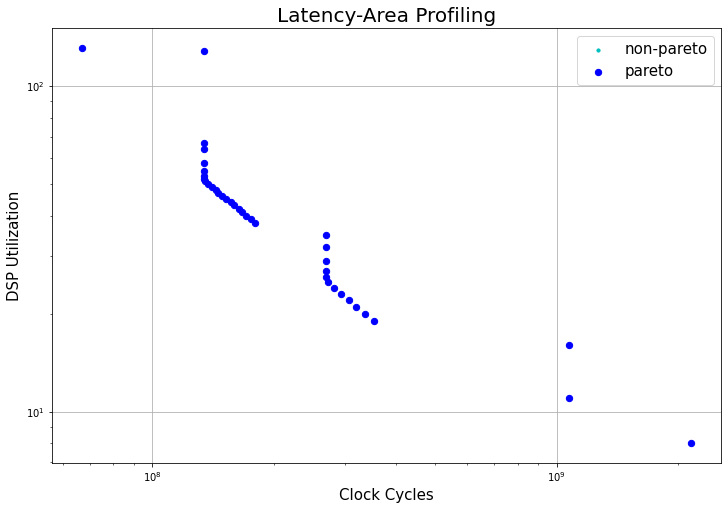

In [6]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Clock Cycles', fontsize=15)
ax.set_ylabel('DSP Utilization', fontsize=15)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Latency-Area Profiling', fontsize=20)

targets = ['non-pareto', 'pareto']
colors = ['c', 'b']
sizes = [10, 40]
for target, color, size in zip(targets, colors, sizes):
    pointsToKeep = dataFile['type'] == target
    ax.scatter(dataFile.loc[pointsToKeep, 'cycle'],
               dataFile.loc[pointsToKeep, 'dsp'],
               c=color, s=size)
ax.legend(targets, fontsize=15)
ax.grid()

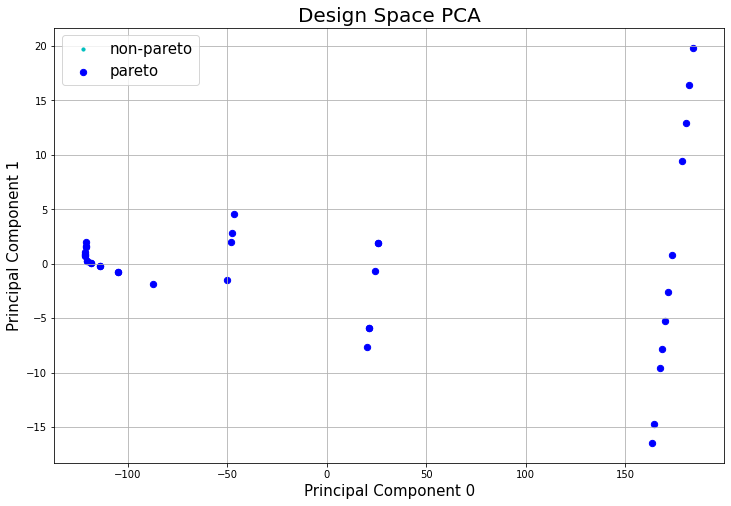

In [7]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 0', fontsize=15)
ax.set_ylabel('Principal Component 1', fontsize=15)
ax.set_title('Design Space PCA', fontsize=20)

# ax.set_xlim([-40, 80])
# ax.set_ylim([-60, 60])

targets = ['non-pareto', 'pareto']
colors = ['c', 'b']
sizes = [10, 40]
for target, color, size in zip(targets, colors, sizes):
    pointsToKeep = pcaDataFile['type'] == target
    ax.scatter(pcaDataFile.loc[pointsToKeep, 'pc0'],
               pcaDataFile.loc[pointsToKeep, 'pc1'],
               c=color, s=size)
ax.legend(targets, fontsize=15)
ax.grid()